In [25]:
### Press shift + tab to see additional options

### Setup

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
%reload_ext autoreload
%autoreload


### Import Data

In [2]:
# Seaborn built in data
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
crash_df = sns.load_dataset("car_crashes")
crash_df.head(2)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK


### Distribution Plot

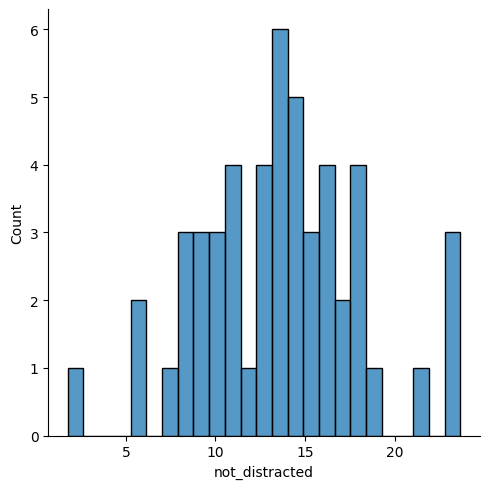

In [5]:
sns.displot(crash_df.not_distracted, kde = False, bins = 25)

### Joint Plot

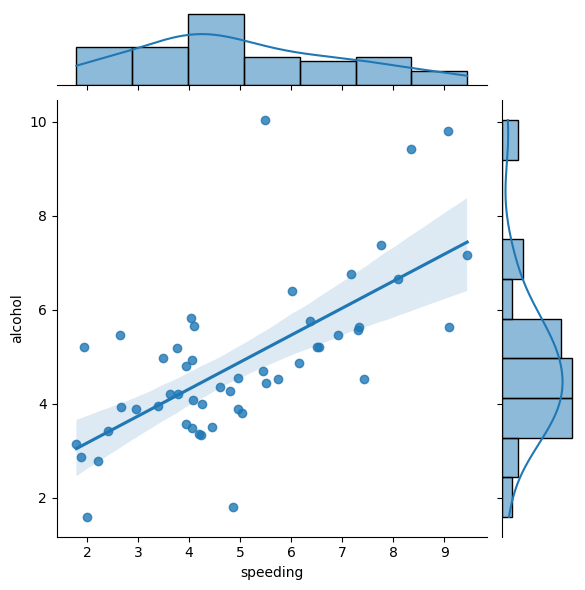

In [7]:
sns.jointplot(x = "speeding", y = "alcohol", data = crash_df, kind = "reg")

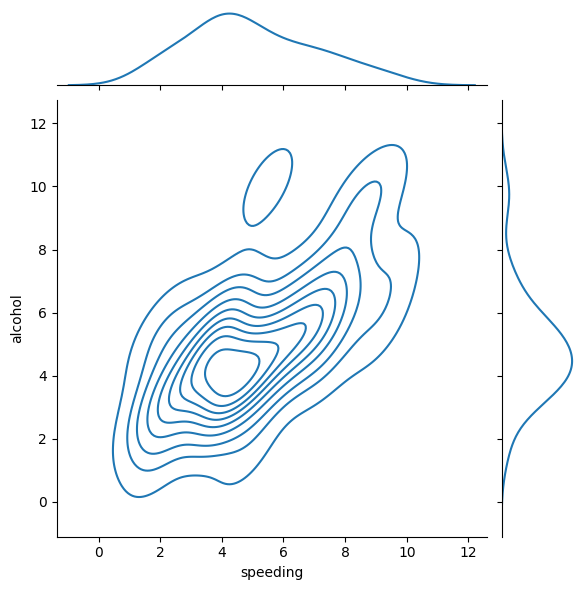

In [8]:
sns.jointplot(x = "speeding", y = "alcohol", data = crash_df, kind = "kde")

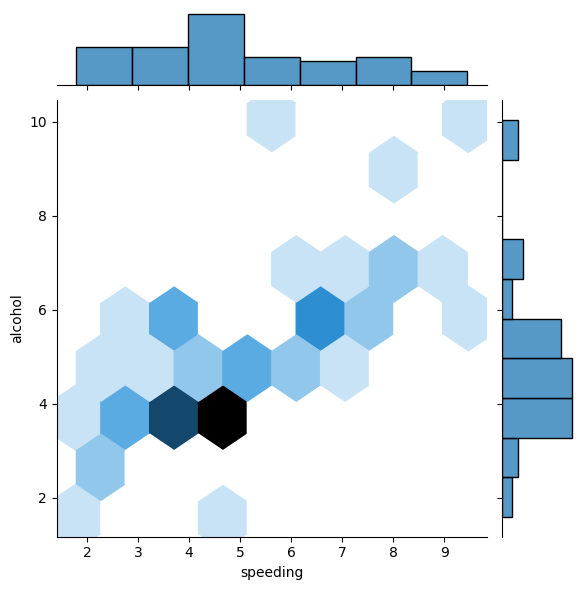

In [9]:
### Hexagon Distribution
sns.jointplot(x = "speeding", y = "alcohol", data = crash_df, kind = "hex")

### KDE Plot

<AxesSubplot: xlabel='alcohol', ylabel='Density'>

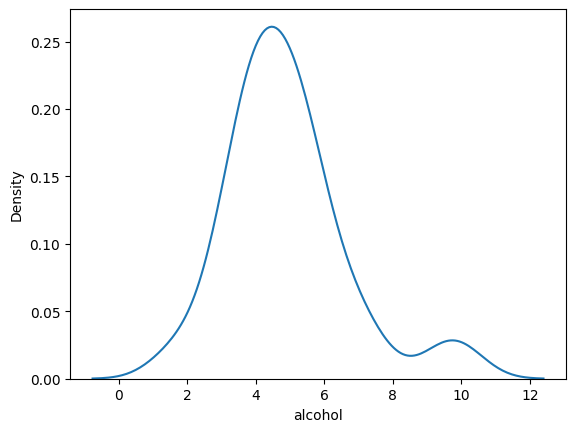

In [11]:
sns.kdeplot(crash_df["alcohol"])

### Pair Plot

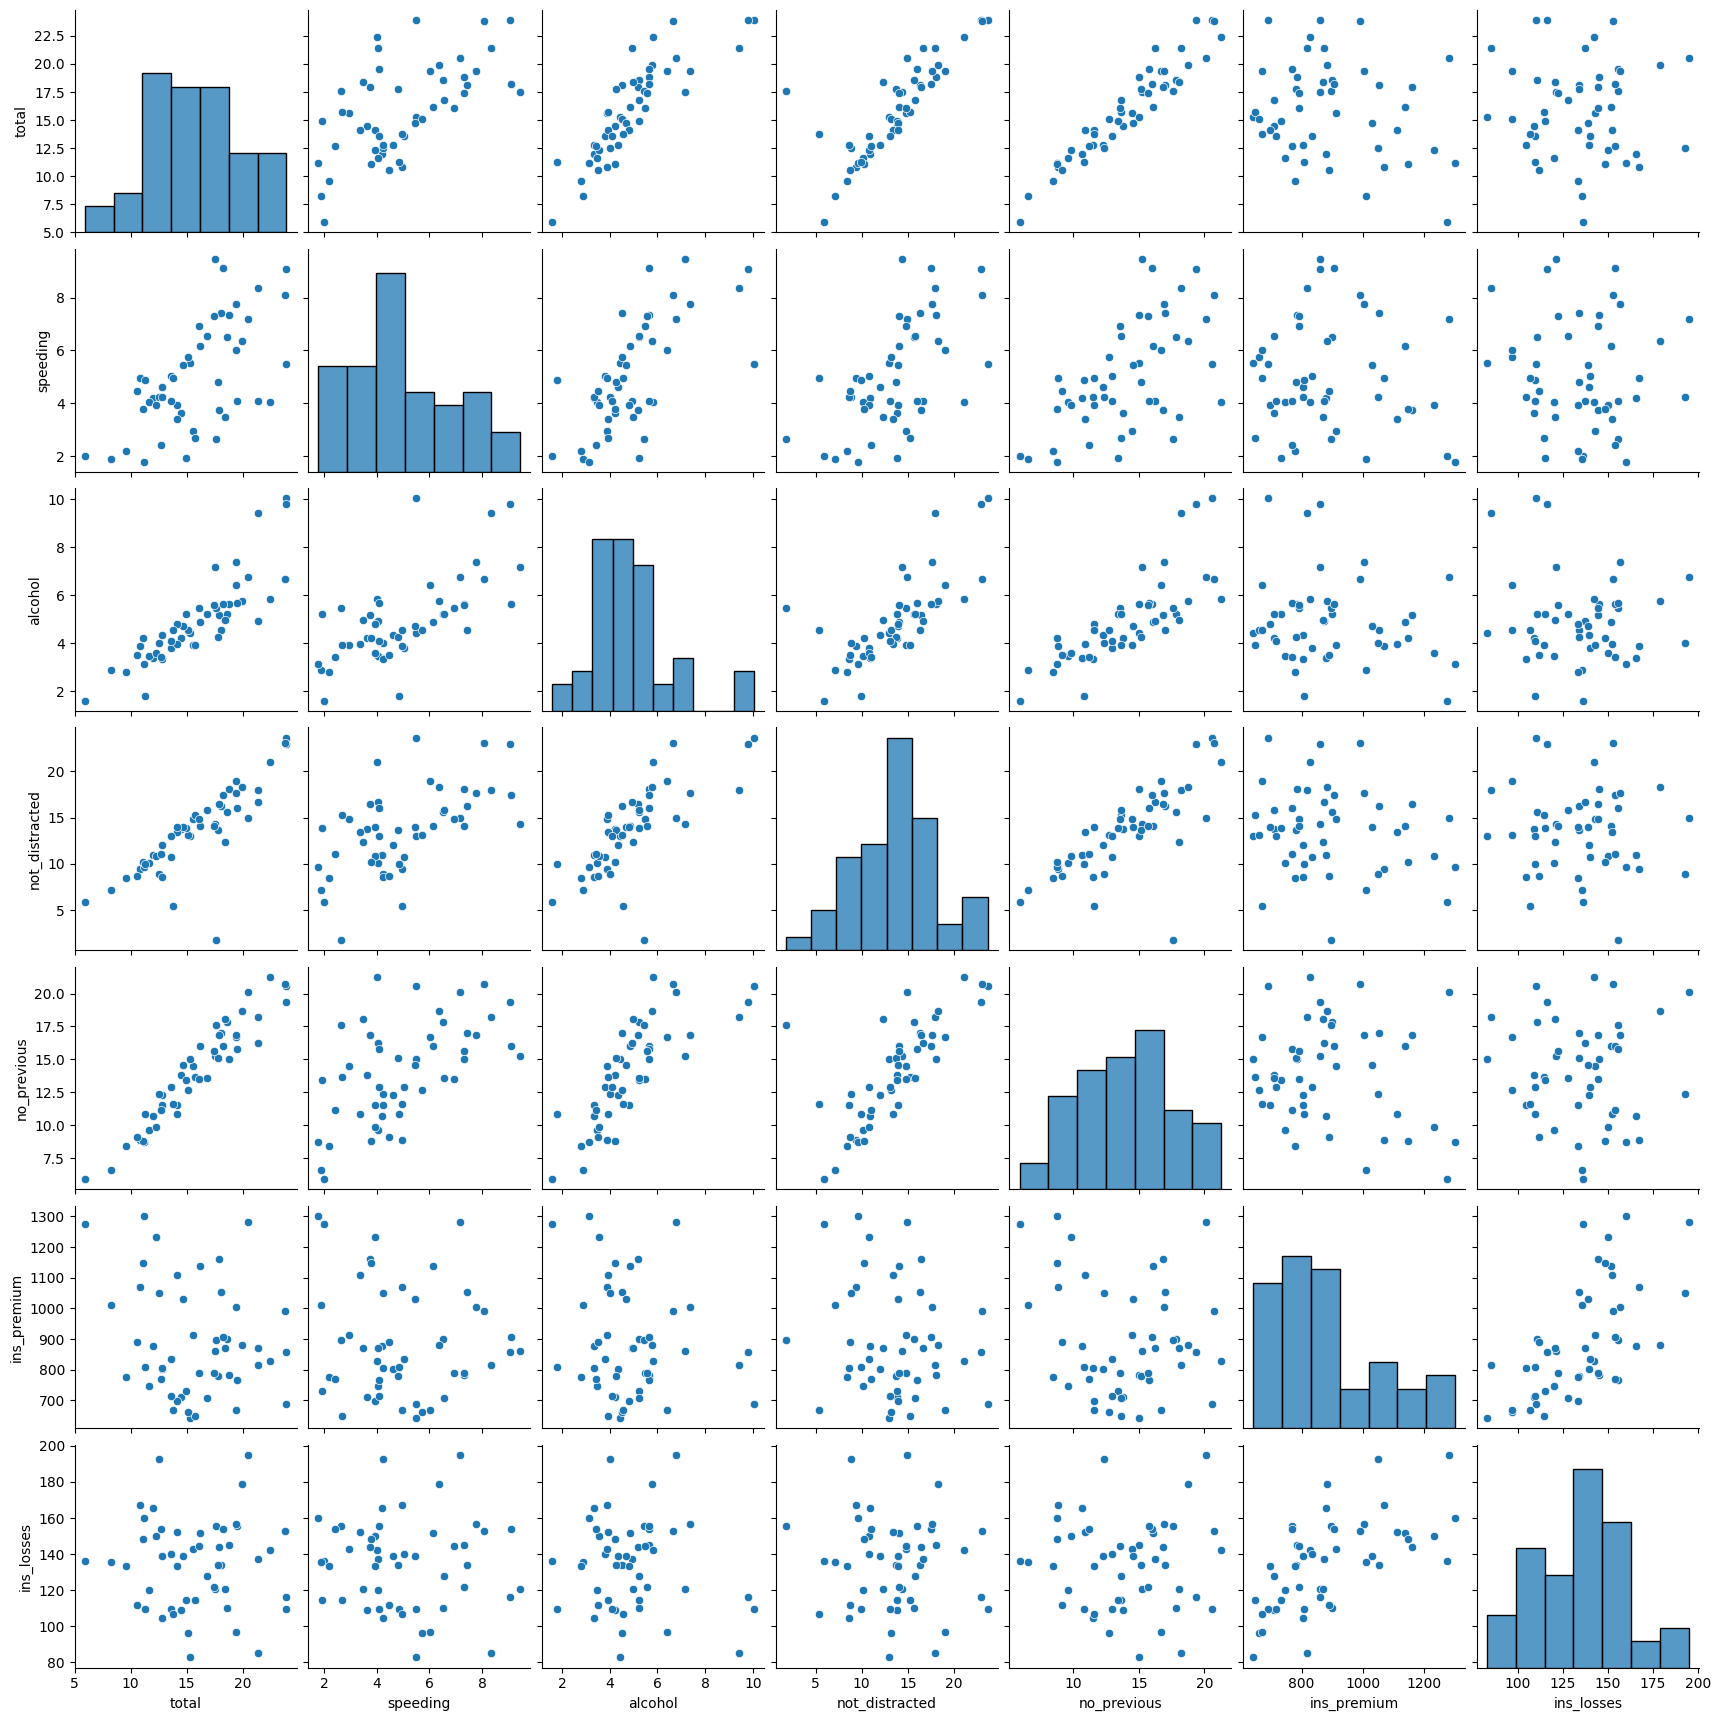

In [13]:
sns.pairplot(crash_df)


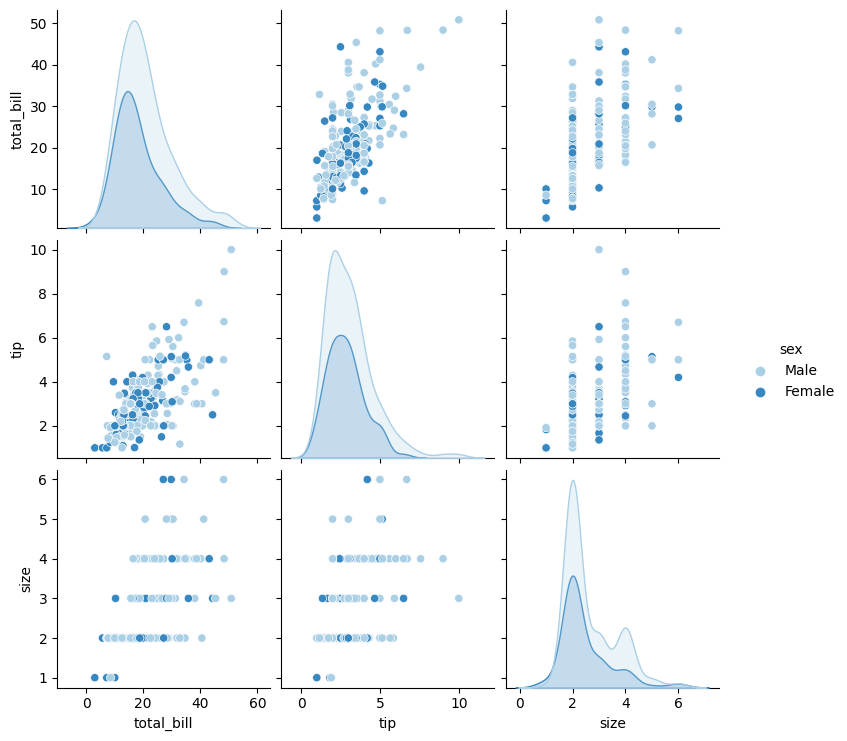

In [14]:
tips_df = sns.load_dataset("tips")
tips_df.head(2)
sns.pairplot(tips_df, hue = "sex", palette = "Blues")

### Rug Plot

<AxesSubplot: xlabel='tip'>

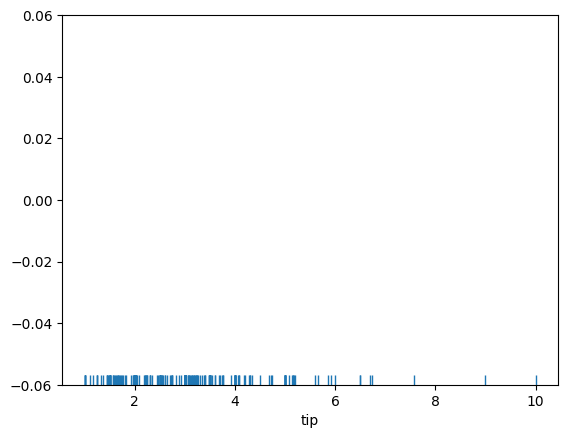

In [16]:
sns.rugplot(tips_df["tip"])

### Styling

<Figure size 800x400 with 0 Axes>

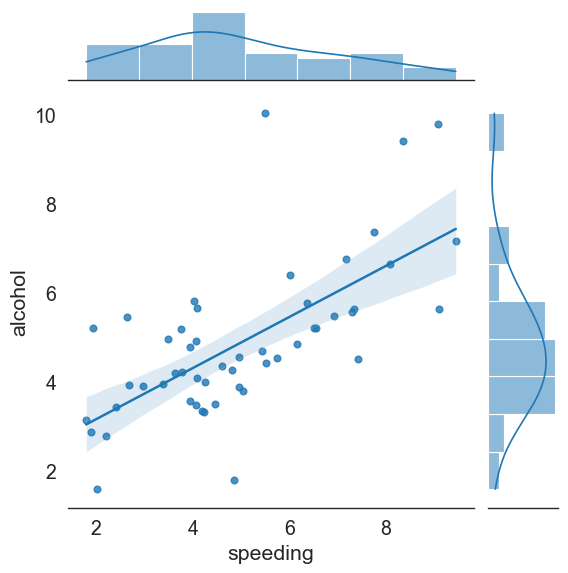

In [18]:
sns.set_style("white") # options are: white ,whitegrid, dark, ticks
plt.figure(figsize = (8,4))
sns.set_context("paper", font_scale = 1.6) # option: paper, poster talk
sns.jointplot(x = "speeding", y = "alcohol", data = crash_df, kind = "reg")

sns.despine(left = True) # removes left and right axes; can remove bottopm axes also

### Categorical Plots

### Bar Plots

<AxesSubplot: xlabel='sex', ylabel='total_bill'>

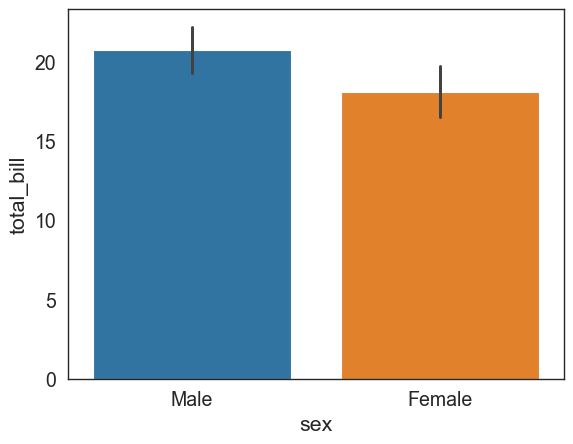

In [21]:
# data based on mean
sns.barplot(x = "sex", y = "total_bill", data = tips_df)

<AxesSubplot: xlabel='sex', ylabel='total_bill'>

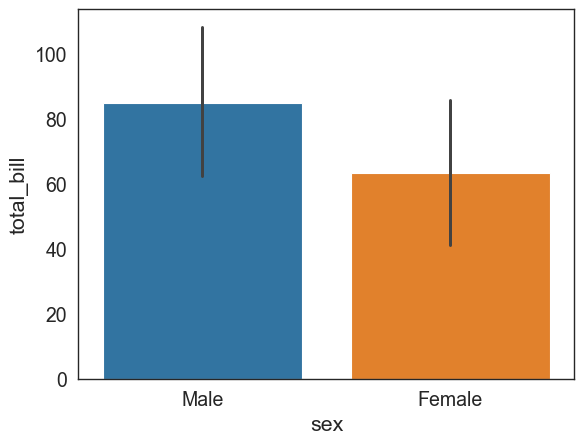

In [22]:
# data based on variance, can do same for median, cov, std
sns.barplot(x = "sex", y = "total_bill", data = tips_df, estimator = np.var)

### Count Plot

<AxesSubplot: xlabel='sex', ylabel='count'>

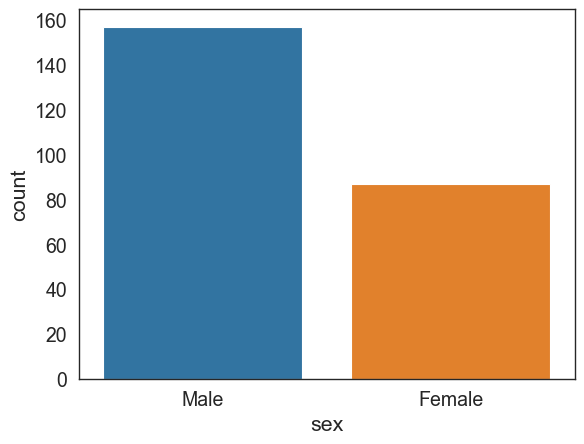

In [24]:
sns.countplot(x = "sex", data = tips_df)

### Box Plot

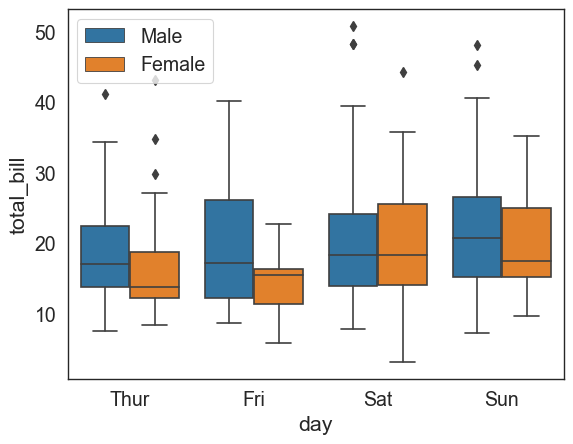

In [29]:
sns.boxplot( x = "day", y = "total_bill", data = tips_df, hue = "sex")
plt.legend(loc = 0) # posns legend so that does not come over graphs

### Violin Plot

<AxesSubplot: xlabel='day', ylabel='total_bill'>

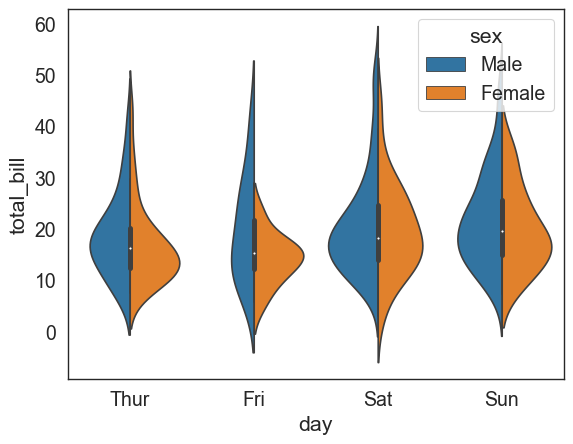

In [32]:
sns.violinplot( x= "day", y = "total_bill", data = tips_df, hue = "sex", split = True)

### Strip Plot

<AxesSubplot: xlabel='day', ylabel='total_bill'>

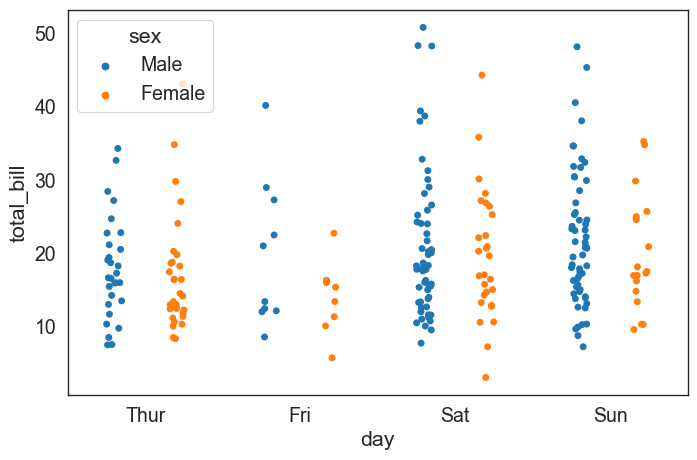

In [38]:
plt.figure(figsize = (8,5))
sns.stripplot(x = "day", y = "total_bill", data = tips_df, jitter = True, hue = "sex", dodge = True)

### Swarm Plot

<AxesSubplot: xlabel='day', ylabel='total_bill'>

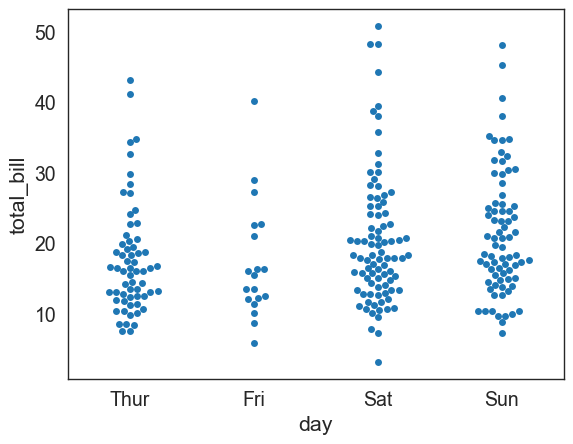

In [42]:

sns.swarmplot(x = "day", y = "total_bill", data = tips_df)

#### Palettes is the colouring style

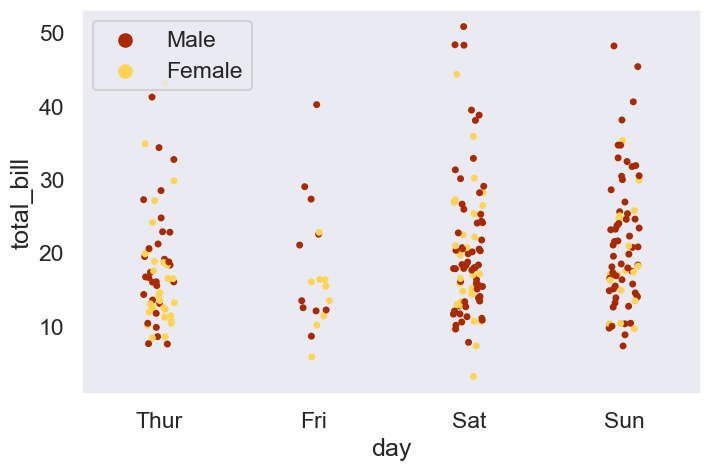

In [48]:
plt.figure(figsize = (8,5))
sns.set_style("dark")
sns.set_context("talk")
sns.stripplot(x = "day", y = "total_bill", data = tips_df, hue = "sex", palette = "afmhot")
plt.legend(loc =0)

### Matrix Plots

### HeatMaps

C:\Users\Mahek\AppData\Local\Temp\ipykernel_3604\2731441830.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crash_mx = crash_df.corr()


<AxesSubplot: >

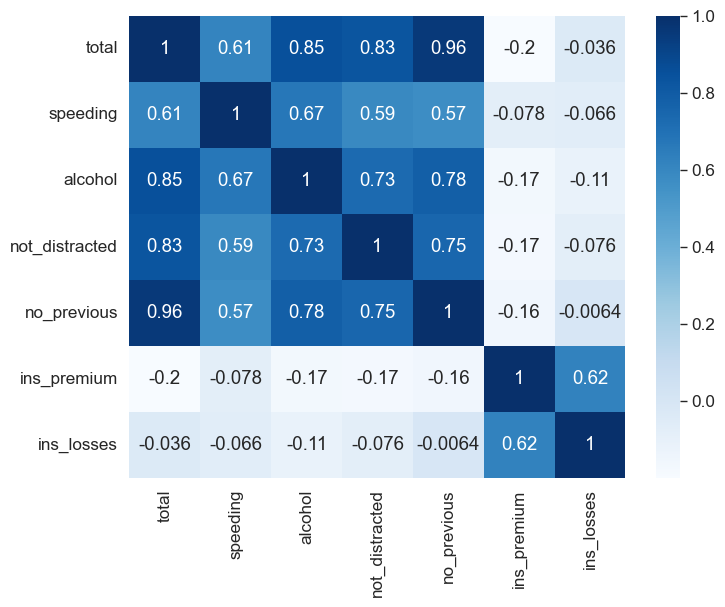

In [59]:
plt.figure(figsize = (8,6))
sns.set_context("paper", font_scale = 1.4)

crash_mx = crash_df.corr()

sns.heatmap(crash_mx, annot = True, cmap = "Blues")

<AxesSubplot: xlabel='year', ylabel='month'>

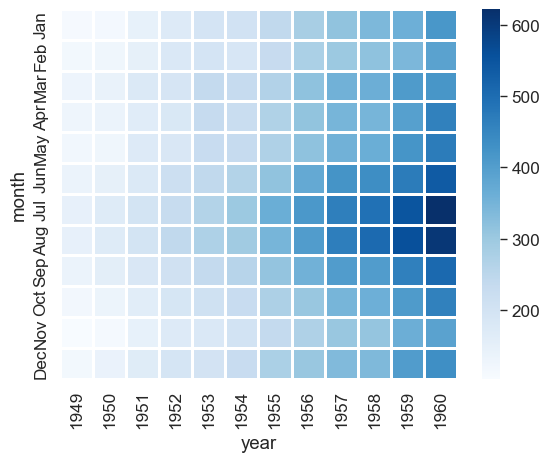

In [68]:
flights = sns.load_dataset("flights")
flights = flights.pivot_table(index = "month", columns = "year", values = "passengers")
flights
sns.heatmap(flights, cmap = "Blues" ,linecolor = "white", linewidth = 1)

### Cluster Map

In [75]:
# iris = sns.load_dataset("iris")
# species = iris.pop("species")
# sns.clustermap(iris)


# sns.clustermap(flights, cmap = "Blues", standard_scales = 1)

### PairGrid

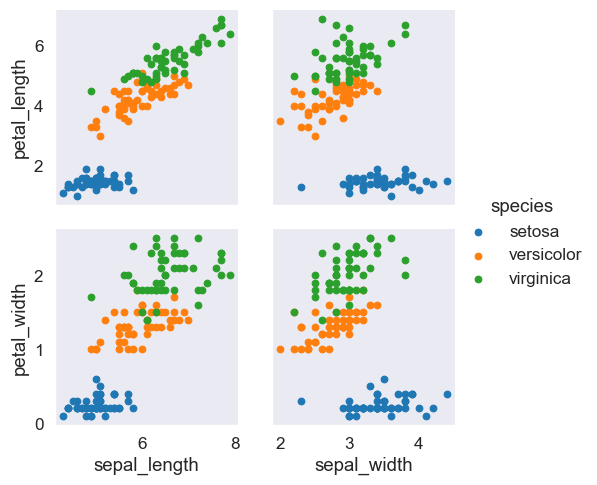

In [86]:
iris = sns.load_dataset("iris")
# iris_q = sns.PairGrid(iris, hue = "species")
# iris_q.map(plt.scatter)

# iris_q.map_diag(plt.hist)

# iris_q.map_offdiag(plt.scatter)

# iris_q.map_upper(plt.scatter)
# iris_q.map_lower(sns.kdeplot)




iris_q = sns.PairGrid(iris, hue = "species",
                      x_vars = ["sepal_length", "sepal_width"],
                     y_vars = ["petal_length", "petal_width"])
iris_q.map(plt.scatter)
iris_q.add_legend()

### Facet Grid

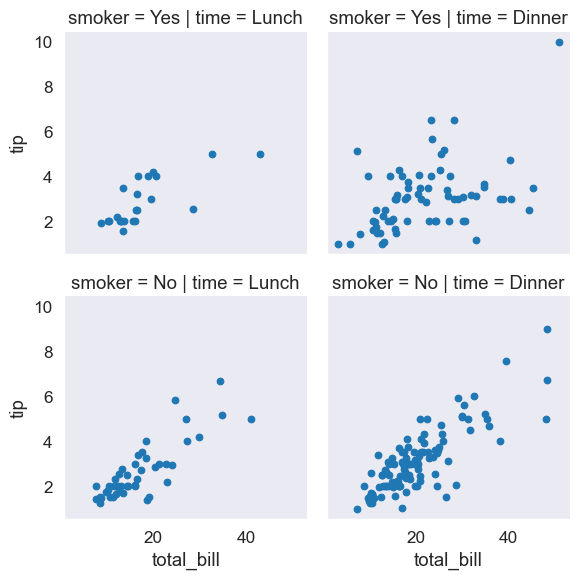

In [91]:
tips_fg = sns.FacetGrid(tips_df, col = "time", row = "smoker")
# tips_fg.map(plt.hist, "total_bill", bins =8 )
tips_fg.map(plt.scatter, "total_bill", "tip")

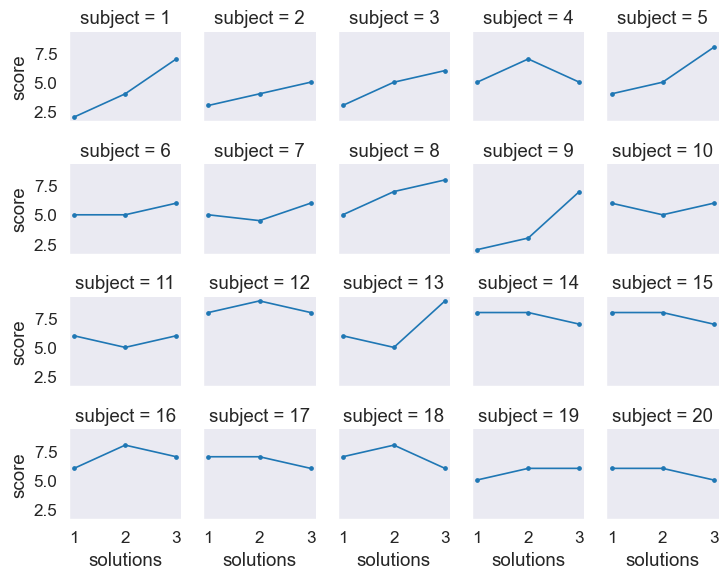

In [103]:
# tips_fg = sns.FacetGrid(tips_df, col = "time", hue = "smoker",height = 4, aspect =1.3, 
#                         col_order = ["Dinner", "Lunch"], palette = "Set1")

# tips_fg.map(plt.scatter, "total_bill", "tip", edgecolor = "w")


# kws = dict(s = 50, linewidth = 0.5, edgecolor = "w")
# tips_fg = sns.FacetGrid(tips_df, col = "sex", hue = "smoker", height = 4, aspect = 1.3, 
#                     hue_order = ["Yes", "No"],
#                       hue_kws = dict(marker = ["*", "v"]))
# tips_fg.map(plt.scatter, "total_bill", "tip", **kws)


att_df = sns.load_dataset("attention")
att_fg = sns.FacetGrid(att_df, col = "subject", col_wrap = 5, height = 1.5)
att_fg.map(plt.plot, "solutions", "score", marker = ".")

### Regression Plots

In [105]:
tips_df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


<Figure size 800x600 with 0 Axes>

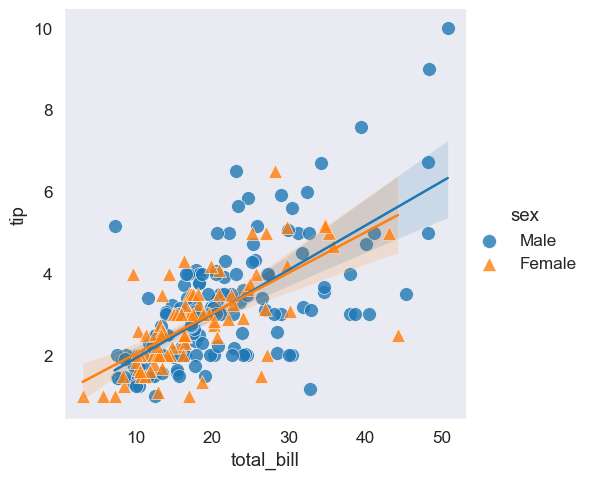

In [107]:
plt.figure(figsize = (8,6))
sns.set_context("paper", font_scale = 1.4)
sns.lmplot(x = "total_bill", y = "tip", hue = "sex", data = tips_df, markers = [ "o", "^"]
          , scatter_kws= { "s": 100, "linewidth": 0.5, "edgecolor": "white"})

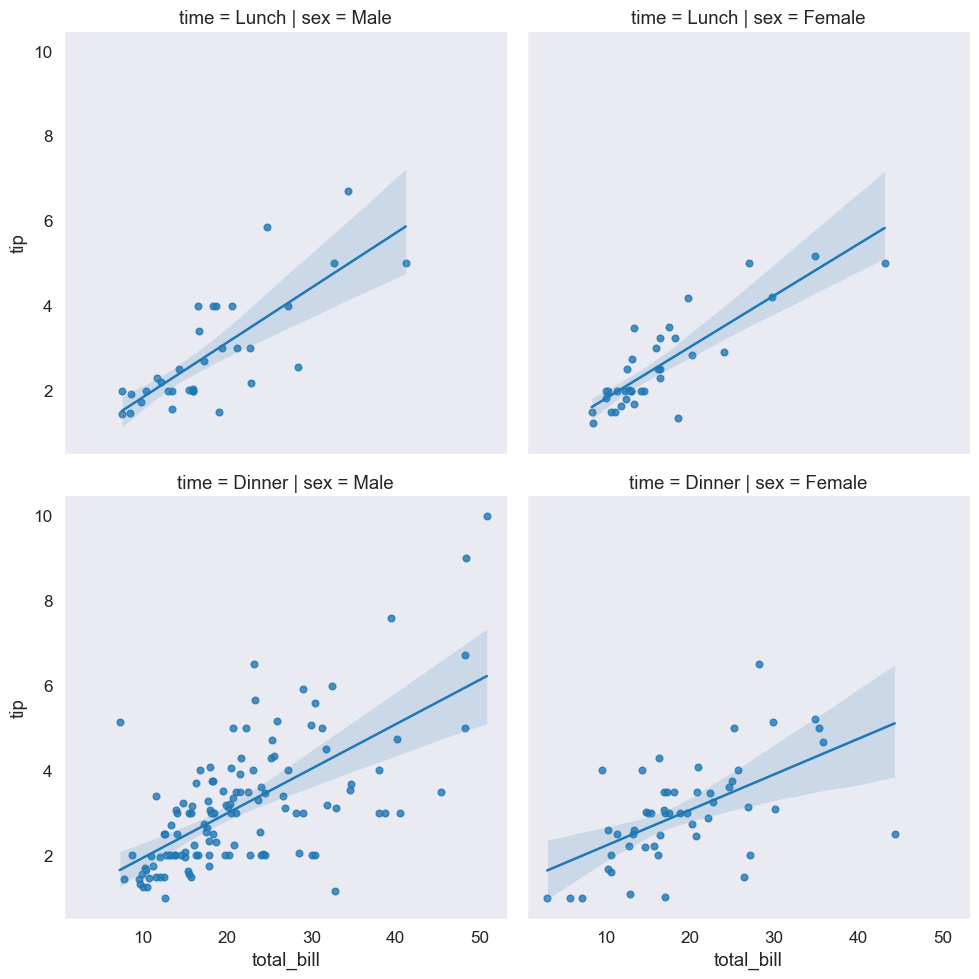

In [108]:
sns.lmplot(x = 'total_bill', y = "tip", col = "sex", row = "time", data = tips_df)